# Data Preproessing

In [ ]:
# mount drive, download kaggle dataset and unzip folder in your google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
# data exploration
# combine track and artist data
df_track = pd.read_csv('/content/drive/MyDrive/aml_data/tracks.csv')  
df_artist = pd.read_csv('/content/drive/MyDrive/aml_data/artists.csv')

print(df_track.shape)
print(df_artist.shape)

(586672, 20)
(1162095, 5)


In [ ]:
# convert list literal to list, and use first artist name
def list_to_first(node):
  try:
    a = ast.literal_eval(node)
    return a[0]
  except:
    return None

In [ ]:
df_track['id_artists'] = df_track['id_artists'].apply(list_to_first)
df_artist['genres'] = df_artist['genres'].apply(list_to_first)

In [ ]:
df = pd.merge(df_track, df_artist, how='left', left_on = 'id_artists', right_on = 'id')
df.head()

,id_x,name_x,popularity_x,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,id_y,followers,genres,name_y,popularity_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,...,0.7440,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,None,Uli,4.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,...,0.0000,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY,3.0,None,Fernando Pessoa,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,...,0.0218,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,3528.0,tango,Ignacio Corsini,23.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,...,0.9180,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,tango,Ignacio Corsini,23.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,...,0.1300,0.311,0.196,103.220,4,3BiJGZsyX9sJchTqcSA7Su,11327.0,adult standards,Dick Haymes,35.0


In [ ]:
print(df.shape)
df.isna().sum()

(586672, 25)


id_x                    0
name_x                 71
popularity_x            0
duration_ms             0
explicit                0
artists                 0
id_artists              0
release_date            0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
id_y                11860
followers           11861
genres              61028
name_y              11860
popularity_y        11860
dtype: int64

In [ ]:
# double check that the nan values in id_y, followers, genres... are correct
# the above would imply that there are songs in the track dataframe whose artists are not in the
# artists dataframe

# drop all rows where 'id_y' column is null: artists from track table that aren't in artists table
df = df.dropna(subset=['id_y'])
df.isnull().sum()

# drop last remaining row where 'followers' column is null
df = df.dropna(subset=['followers'])
df.isnull().sum()

id_x                    0
name_x                  0
popularity_x            0
duration_ms             0
explicit                0
artists                 0
id_artists              0
release_date            0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
id_y                    0
followers               0
genres              49168
name_y                  0
popularity_y            0
dtype: int64

In [ ]:
df = df.drop(columns=['artists','id_artists','id_y','id_x','name_x','name_y'])

In [ ]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df = df.drop(columns = ['release_date'])

In [ ]:
X = df.drop(columns=['popularity_x'])
y = df['popularity_x']

#Data Splitting

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Encoding and Standardization

In [ ]:
X_dev.dtypes

duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
followers           float64
genres               object
popularity_y        float64
release_year          int64
dtype: object

In [ ]:
num_features = list(X_dev.columns.values)
num_features.remove('genres')
te_feature = ['genres']

In [ ]:
preprocess = make_column_transformer((TargetEncoder(handle_missing = 'value'), te_feature),
                                     (StandardScaler(), num_features)
                                     )
preprocess

ColumnTransformer(transformers=[('targetencoder',
                                 TargetEncoder(handle_unknown='ignore'),
                                 ['genres']),
                                ('standardscaler', StandardScaler(),
                                 ['duration_ms', 'explicit', 'danceability',
                                  'energy', 'key', 'loudness', 'mode',
                                  'speechiness', 'acousticness',
                                  'instrumentalness', 'liveness', 'valence',
                                  'tempo', 'time_signature', 'followers',
                                  'popularity_y', 'release_year'])])

In [ ]:
X_dev_processed = preprocess.fit_transform(X_dev,y_dev)
X_test_processed = preprocess.transform(X_test)
# The preprocessed development datasets are X_dev_processed, y_dev, X_test_processed, y_test

# Model Training 

In [ ]:
# example of pipeline
# use ridge regression as an example
pipe = make_pipeline(preprocess, GridSearchCV(Ridge(), param_grid = [{'alpha': np.logspace(-3,1,20)}]))
#Because the pipeline includes data preprocessing, we directly the unprocessed data X_dev
pipe.fit(X_dev, y_dev)
pipe.named_steps['gridsearchcv'].best_score_
pipe.named_steps['gridsearchcv'].best_params_

{'alpha': 10.0}

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from pprint import pprint
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_dev_processed, y_dev)

DecisionTreeRegressor(random_state=42)

In [ ]:
preprocess.fit(X_dev, y_dev)
X_test_processed = preprocess.transform(X_test)

In [ ]:
import numpy as np
sum(np.isnan(X_test_processed))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

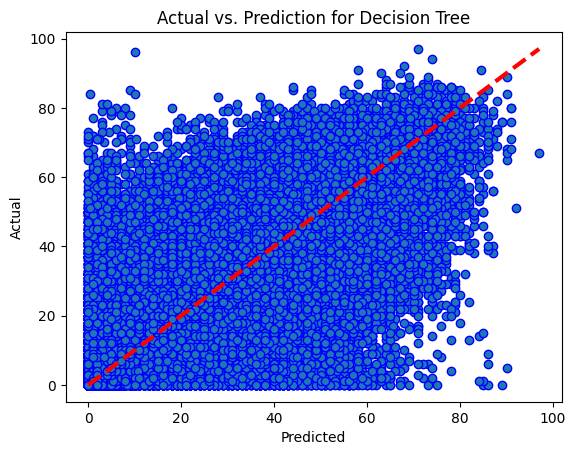

In [ ]:
# On the test dataset
import matplotlib.pyplot as plt
y_predicted = tree.predict(X_test_processed)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Actual vs. Prediction for Decision Tree')
plt.show()

In [ ]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 8.750127729189524
MSE is 160.66126142313715
R2 score is 0.518983272453363


In [ ]:
pprint(tree.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}


### Decision Tree Hyperparameter Tuning

In [ ]:
# Grid Search
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(preprocess,tree)
grid_params = {'decisiontreeregressor__criterion': ['squared_error'],
              'decisiontreeregressor__max_depth': [3,7,11],
              'decisiontreeregressor__max_features':["auto","log2","sqrt",None],
              'decisiontreeregressor__max_leaf_nodes':[None,10,50,90]}
grid = GridSearchCV(pipe,grid_params,cv = 3,scoring = 'neg_mean_absolute_error')
grid.fit(X_dev,y_dev)

In [ ]:
#best set of perameters
grid.best_params_

{'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': 11,
 'decisiontreeregressor__max_features': 'auto',
 'decisiontreeregressor__max_leaf_nodes': None}

In [ ]:
#best score with best set of perameters
print('The best mean absolute error from cross validation is ', -(grid.best_score_))

The best mean absolute error from cross validation is  7.467164664591728


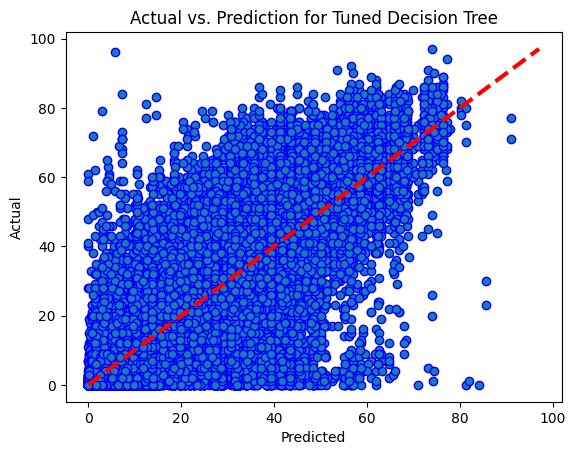

In [ ]:
# On the test dataset
y_predicted_tuned = grid.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_predicted_tuned, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Actual vs. Prediction for Tuned Decision Tree')
plt.show()

In [ ]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted_tuned)
mse = metrics.mean_squared_error(y_test, y_predicted_tuned)
r2 = metrics.r2_score(y_test, y_predicted_tuned)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 7.441949196750377
MSE is 105.33980590217921
R2 score is 0.6846146465761095


# Linear/Lasso/Ridge

In [ ]:
# ridge regression
pipe_ridge = make_pipeline(preprocess, GridSearchCV(Ridge(), param_grid = [{'alpha': np.logspace(-3,3,10)}]))
pipe_ridge.fit(X_dev, y_dev)
y_pred_ridge = pipe_ridge.predict(X_test)
best_score_ridge = pipe_ridge.named_steps['gridsearchcv'].best_score_
best_alpha_ridge = pipe_ridge.named_steps['gridsearchcv'].best_params_['alpha']
print("Best score: ", best_score_ridge)
print("Best alpha: ", best_alpha_ridge)

Best score:  0.6037604190828715
Best alpha:  46.41588833612773


In [ ]:
# ridge regression model evaluation for testing set
mae_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = metrics.mean_squared_error(y_test, y_pred_ridge)
r2_ridge = metrics.r2_score(y_test, y_pred_ridge)

print("The ridge regression model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_ridge))
print('MSE is {}'.format(mse_ridge))
print('R2 score is {}'.format(r2_ridge))

The ridge regression model performance for testing set
--------------------------------------
MAE is 8.820764448509768
MSE is 134.05278762730669
R2 score is 0.5986485313770527


In [ ]:
# lasso regression
pipe_lasso = make_pipeline(preprocess, GridSearchCV(Lasso(), param_grid = [{'alpha': np.logspace(-3,3,10)}]))
pipe_lasso.fit(X_dev, y_dev)
y_pred_lasso = pipe_lasso.predict(X_test)
best_score_lasso = pipe_lasso.named_steps['gridsearchcv'].best_score_
best_alpha_lasso = pipe_lasso.named_steps['gridsearchcv'].best_params_['alpha']
print("Best score: ", best_score_lasso)
print("Best alpha: ", best_alpha_lasso)

Best score:  0.6037607417939074
Best alpha:  0.001


In [ ]:
# lasso regression model evaluation for testing set
mae_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = metrics.mean_squared_error(y_test, y_pred_lasso)
r2_lasso = metrics.r2_score(y_test, y_pred_lasso)

print("The lasso regression model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_lasso))
print('MSE is {}'.format(mse_lasso))
print('R2 score is {}'.format(r2_lasso))

The lasso regression model performance for testing set
--------------------------------------
MAE is 8.820635938950444
MSE is 134.05318102030333
R2 score is 0.5986473535659846


In [ ]:
# linear regression
pipe_lr = make_pipeline(preprocess, LinearRegression())
pipe_lr.fit(X_dev, y_dev)
y_pred_lr = pipe_lr.predict(X_test)
scores_lr = cross_val_score(pipe_lr, X_dev, y_dev, cv=10, error_score='raise')
print("Average score: ", np.mean(scores_lr))

Average score:  0.6015017929826499


In [ ]:
# linear regression model evaluation for testing set
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
r2_lr = metrics.r2_score(y_test, y_pred_lr)

print("The linear regression model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_lr))
print('MSE is {}'.format(mse_lr))
print('R2 score is {}'.format(r2_lr))

The linear regression model performance for testing set
--------------------------------------
MAE is 8.820786045933888
MSE is 134.0527742458719
R2 score is 0.5986485714408111


# Random forest



In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pipe = make_pipeline(preprocess, GridSearchCV(RandomForestRegressor(), param_grid = [{'n_estimators': [100, 150], 'max_depth': [None, 10], 'oob_score': [True]}],verbose = 4))
#Because the pipeline includes data preprocessing, we directly the unprocessed data X_dev
pipe.fit(X_dev, y_dev)
pipe.named_steps['gridsearchcv'].best_score_
pipe.named_steps['gridsearchcv'].best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END max_depth=None, n_estimators=100, oob_score=True;, score=0.752 total time=12.6min
[CV 2/5] END max_depth=None, n_estimators=100, oob_score=True;, score=0.758 total time=12.9min
[CV 3/5] END max_depth=None, n_estimators=100, oob_score=True;, score=0.753 total time=13.1min
[CV 4/5] END max_depth=None, n_estimators=100, oob_score=True;, score=0.751 total time=12.6min
[CV 5/5] END max_depth=None, n_estimators=100, oob_score=True;, score=0.754 total time=12.9min
[CV 1/5] END max_depth=None, n_estimators=150, oob_score=True;, score=0.753 total time=19.4min
[CV 2/5] END max_depth=None, n_estimators=150, oob_score=True;, score=0.759 total time=19.0min
[CV 3/5] END max_depth=None, n_estimators=150, oob_score=True;, score=0.755 total time=19.0min
[CV 4/5] END max_depth=None, n_estimators=150, oob_score=True;, score=0.753 total time=19.2min
[CV 5/5] END max_depth=None, n_estimators=150, oob_score=True;, score=0.755 total tim

{'max_depth': None, 'n_estimators': 150, 'oob_score': True}

In [ ]:
best_n = pipe.named_steps['gridsearchcv'].best_params_['n_estimators']
best_depth = pipe.named_steps['gridsearchcv'].best_params_['max_depth']\

In [ ]:
y_predicted_tuned = pipe.named_steps['gridsearchcv'].predict(X_test_processed)

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_predicted_tuned)
mse = metrics.mean_squared_error(y_test, y_predicted_tuned)
r2 = metrics.r2_score(y_test, y_predicted_tuned)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 6.475067116843577
MSE is 81.33462442070982
R2 score is 0.7564856983660505


In [ ]:
from matplotlib import pyplot as plt
rf = RandomForestRegressor(random_state=0, n_estimators= 150)
model = rf.fit(X_dev_processed, y_dev)
cols = list(X_dev.columns)

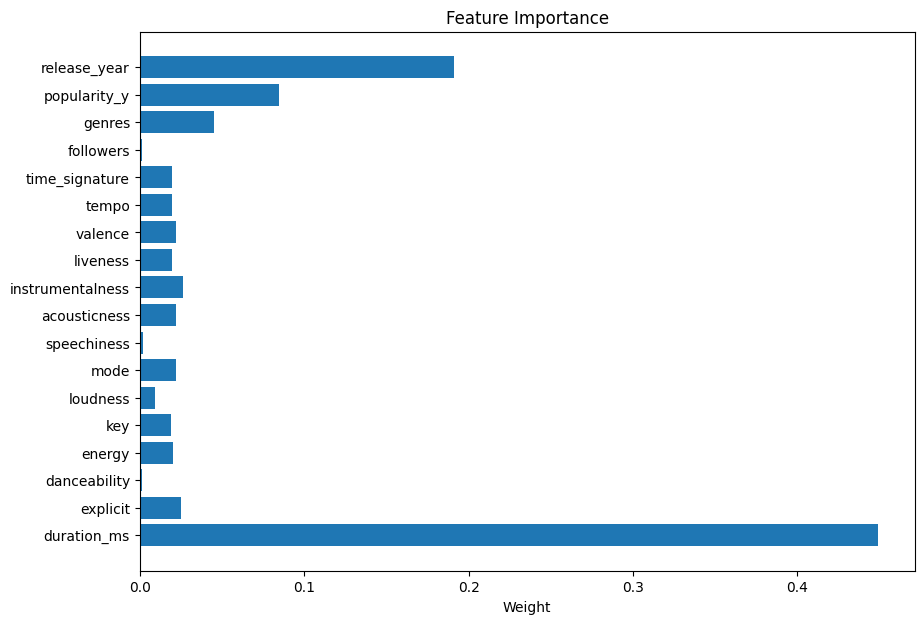

In [ ]:
plt.figure(figsize=(10,7))
plt.barh(y= cols, width = rf.feature_importances_)
plt.xlabel('Weight')
plt.title('Feature Importance')
plt.show()

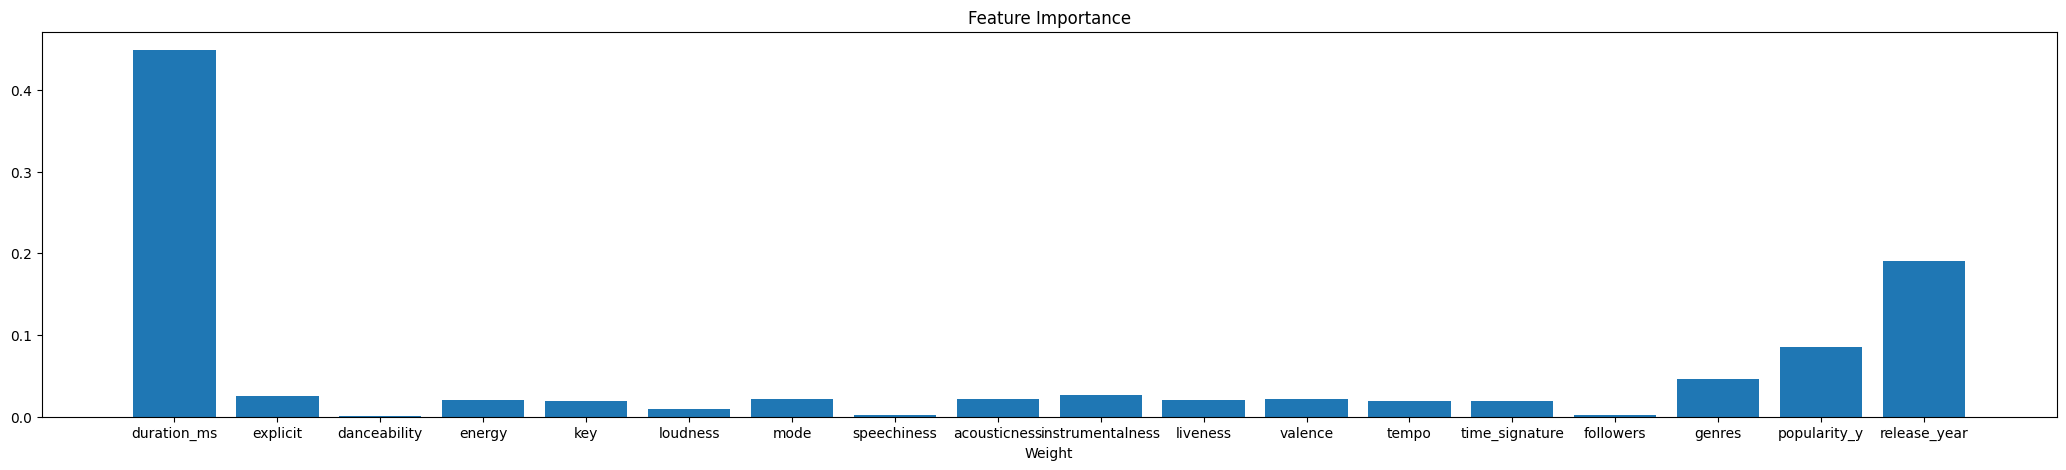

In [ ]:
from matplotlib import pyplot as plt
rf = RandomForestRegressor(random_state=0, n_estimators= 150)
model = rf.fit(X_dev_processed, y_dev)
cols = list(X_dev.columns)
plt.figure(figsize=(26,5))
plt.bar(x= cols, height = rf.feature_importances_)
plt.xlabel('Weight')
plt.title('Feature Importance')
plt.show()

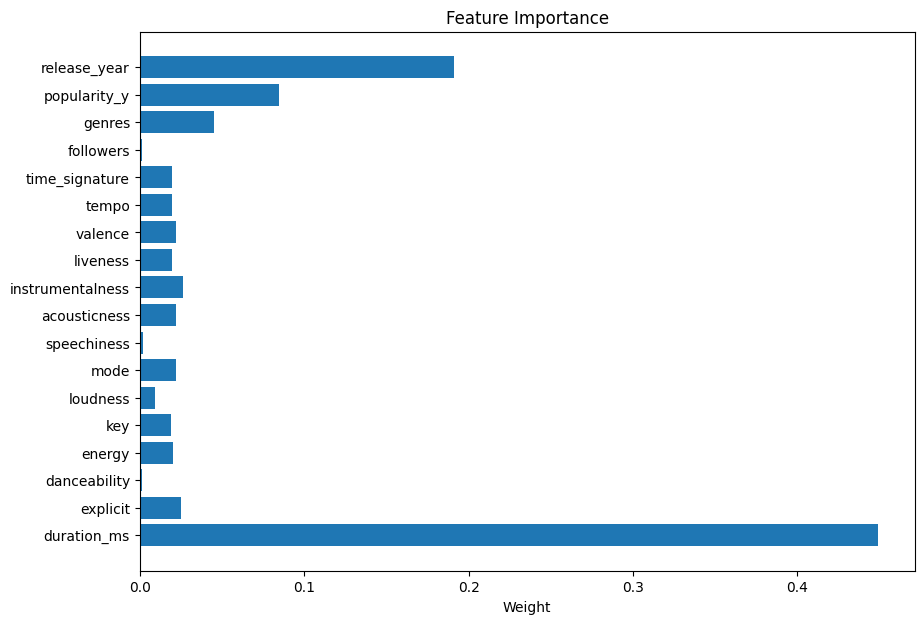

In [ ]:
plt.figure(figsize=(10,7))
plt.barh(y= cols, width = rf.feature_importances_)
plt.xlabel('Weight')
plt.title('Feature Importance')
plt.show()

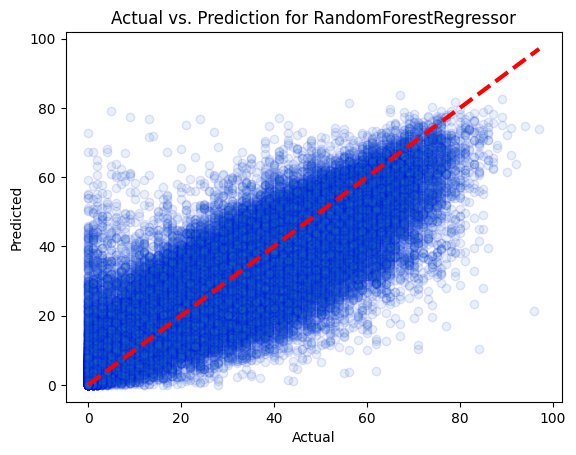

In [ ]:
fig, ax = plt.subplots()
ax.scatter( y_test, y_predicted_tuned,edgecolors=(0, 0, 1),alpha=0.1)
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
ax.set_title('Actual vs. Prediction for RandomForestRegressor')
plt.show()

## XGBoost

In [26]:
import xgboost as xgb
base_xgb = xgb.XGBRegressor(random_state = 42)
base_xgb.fit(X_dev_processed, y_dev)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [27]:
from pprint import pprint
pprint(base_xgb.get_params())

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


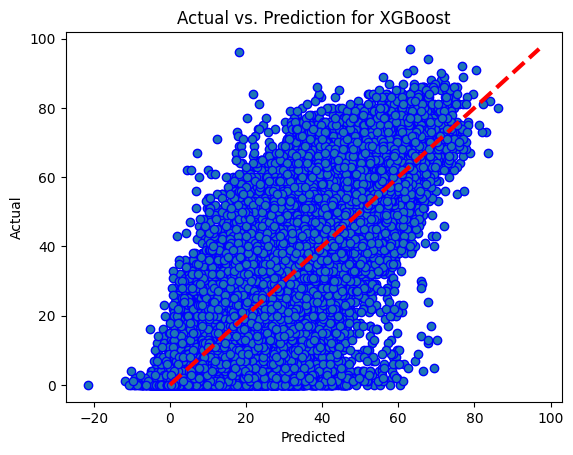

In [19]:
import matplotlib.pyplot as plt
y_predicted = base_xgb.predict(X_test_processed)
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Actual vs. Prediction for XGBoost')
plt.show()

In [20]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 7.061456804545555
MSE is 92.34769867335392
R2 score is 0.7235127658102497


### XGBoost Hyperparameter Tuning

In [28]:
# Grid Search
from sklearn.pipeline import make_pipeline
pipe_XGBoost = make_pipeline(preprocess,base_xgb)
grid_params_XGBoost = {         
    'xgbregressor__max_depth': [6,12],          
    'xgbregressor__min_child_weight': [1,5],   
    'xgbregressor__n_estimators': [100, 250, 400],      
    'xgbregressor__learning_rate': [0.001, 0.01]}
grid_XGBoost = GridSearchCV(pipe_XGBoost,grid_params_XGBoost,cv = 5,scoring = 'neg_mean_absolute_error', verbose = 1)
grid_XGBoost.fit(X_dev,y_dev)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('targetencoder',
                                                                         TargetEncoder(),
                                                                         ['genres']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['duration_ms',
                                                                          'explicit',
                                                                          'danceability',
                                                                          'energy',
                                                                          'key',
                                                                          'loudness',
                                                                          'mode',
                                                                          'speechiness',
                                                                          'acousticness',
                                                                          'instrumentalness',
                                                                          'liveness',
                                                                          'valence',
                                                                          'tempo',
                                                                          'time_signature',
                                                                          'foll...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=42, ...))]),
             param_grid={'xgbregressor__learning_rate': [0.001, 0.01],
                         'xgbregressor__max_depth': [6, 12],
                         'xgbregressor__min_child_weight': [1, 5],
                         'xgbregressor__n_estimators': [100, 250, 400]},
             scoring='neg_mean_absolute_error', verbose=1)

In [29]:
#best set of perameters
grid_XGBoost.best_params_

{'xgbregressor__learning_rate': 0.01,
 'xgbregressor__max_depth': 12,
 'xgbregressor__min_child_weight': 1,
 'xgbregressor__n_estimators': 400}

In [30]:
#best score with best set of perameters
print('The best mean absolute error from cross validation is ', -(grid_XGBoost.best_score_))

The best mean absolute error from cross validation is  6.648705404208296


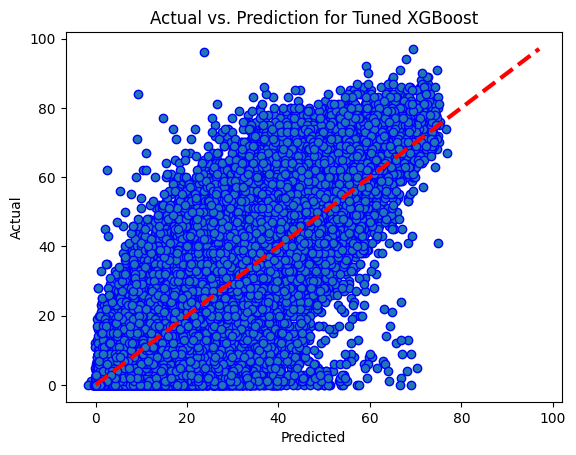

In [31]:
# On the test dataset
y_predicted_tuned = grid_XGBoost.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_predicted_tuned, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Actual vs. Prediction for Tuned XGBoost')
plt.show()

In [32]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted_tuned)
mse = metrics.mean_squared_error(y_test, y_predicted_tuned)
r2 = metrics.r2_score(y_test, y_predicted_tuned)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 6.617175751402327
MSE is 83.78714818953995
R2 score is 0.7491428893586819


In [34]:
final_xgboost = xgb.XGBRegressor(learning_rate= 0.01, max_depth = 12, min_child_weight=1,
                                 n_estimators = 400,
                                 random_state = 42)
final_xgboost.fit(X_dev_processed, y_dev)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

Text(0.5, 0, 'Xgboost Feature Importance')

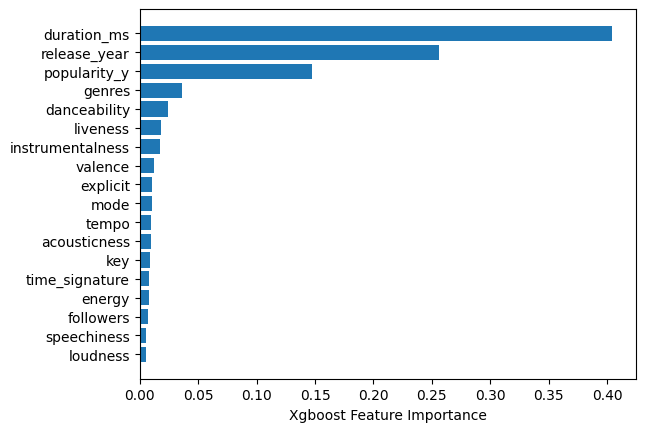

In [42]:
sorted_idx = final_xgboost.feature_importances_.argsort()
plt.barh(X_dev.columns[sorted_idx], final_xgboost.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

# KNR

In [ ]:
knr_param_grid = {
    'n_neighbors': [1, 5, 10, 20],
}
## best n_neighbors = 20 [1, 5, 10, 20]

pipe = make_pipeline(preprocess, GridSearchCV(KNeighborsRegressor(), knr_param_grid, scoring='neg_root_mean_squared_error'))
pipe.fit(X_dev, y_dev)
y_pred_knr = pipe.predict(X_test)
print(pipe.named_steps['gridsearchcv'].best_score_)
print(pipe.named_steps['gridsearchcv'].best_params_)

-10.952805965710304
{'n_neighbors': 20}


In [ ]:
mae_knr = metrics.mean_absolute_error(y_test, y_pred_knr)
mse_knr = metrics.mean_squared_error(y_test, y_pred_knr)
r2_knr = metrics.r2_score(y_test, y_pred_knr)

print(f'MAE: {mae_knr}')
print(f'RMSE: is {np.sqrt(mse_knr)}')
print(f'R2 score is {r2_knr}')

MAE: 8.18182980611153
RMSE: is 10.947600439226276
R2 score is 0.64117153804615


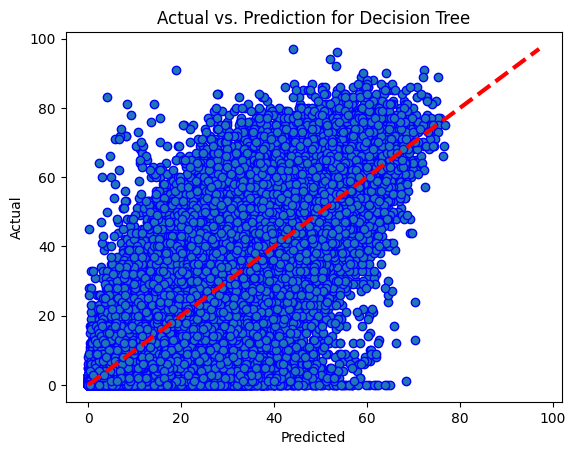

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_pred_knr, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Actual vs. Prediction for KNR')
plt.show()

# Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

### Trying different batchsizes, number of layers and number of neurons in each layer

In [ ]:
# model = Sequential()
# model.add(Dense(64, input_dim= 18, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='relu'))

# model.compile(loss='mean_squared_error', optimizer='adam')

# n_epochs = 10
# results = model.fit(X_dev_processed, y_dev, epochs=n_epochs, batch_size = 32, validation_split=0.2)

# model = Sequential()
# model.add(Dense(64, input_dim= 18, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='relu'))
# model.compile(loss='mean_squared_error', optimizer='adam')

# n_epochs = 25
# results = model.fit(X_dev_processed, y_dev, epochs=n_epochs, batch_size = 64, validation_split=0.2)

# model = Sequential()
# model.add(Dense(64, input_dim= 18, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='relu'))
# model.compile(loss='mean_squared_error', optimizer='adam')#Rsquare

# n_epochs = 50
# results = model.fit(X_dev_processed, y_dev, epochs=n_epochs, batch_size = 128, validation_split=0.2)

# plt.plot(results.history['loss'],label = 'Train loss')
# plt.plot(results.history['val_loss'],label = 'Validation loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

# model = Sequential()
# model.add(Dense(128, input_dim= 18, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='relu'))
# model.compile(loss='mean_squared_error', optimizer='adam')#Rsquare

# n_epochs = 50
# results = model.fit(X_dev_processed, y_dev, epochs=n_epochs, batch_size = 128, validation_split=0.2)
# plt.plot(results.history['loss'],label = 'Train loss')
# plt.plot(results.history['val_loss'],label = 'Validation loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

# model = Sequential()
# model.add(Dense(128, input_dim= 18, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='relu'))

# model.compile(loss='mean_squared_error', optimizer='adam')#Rsquare

# n_epochs = 75
# results = model.fit(X_dev_processed, y_dev, epochs=n_epochs, batch_size = 128, validation_split=0.2)
# plt.plot(results.history['loss'],label = 'Train loss')
# plt.plot(results.history['val_loss'],label = 'Validation loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

# model = Sequential()
# model.add(Dense(128, input_dim= 18, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='relu'))

# model.compile(loss='mean_squared_error', optimizer='adam')

# n_epochs = 50
# results = model.fit(X_dev_processed, y_dev, epochs=n_epochs, batch_size = 64, validation_split=0.2)

# plt.plot(results.history['loss'],label = 'Train loss')
# plt.plot(results.history['val_loss'],label = 'Validation loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim= 18, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')#Rsquare

n_epochs = 70
results = model.fit(X_dev_processed, y_dev, epochs=n_epochs, batch_size = 128, validation_split=0.2)

Epoch 1/70
2875/2875 [==============================] - 32s 11ms/step - loss: 129.6460 - val_loss: 119.5872
Epoch 2/70
2875/2875 [==============================] - 9s 3ms/step - loss: 118.8284 - val_loss: 116.8249
Epoch 3/70
2875/2875 [==============================] - 8s 3ms/step - loss: 116.6008 - val_loss: 115.7486
Epoch 4/70
2875/2875 [==============================] - 9s 3ms/step - loss: 114.8313 - val_loss: 114.7634
Epoch 5/70
2875/2875 [==============================] - 8s 3ms/step - loss: 113.4373 - val_loss: 114.2982
Epoch 6/70
2875/2875 [==============================] - 10s 4ms/step - loss: 112.2612 - val_loss: 111.8651
Epoch 7/70
2875/2875 [==============================] - 9s 3ms/step - loss: 111.2971 - val_loss: 111.2854
Epoch 8/70
2875/2875 [==============================] - 8s 3ms/step - loss: 110.4184 - val_loss: 110.0036
Epoch 9/70
2875/2875 [==============================] - 9s 3ms/step - loss: 109.4784 - val_loss: 109.6934
Epoch 10/70
2875/2875 [====================

In [ ]:
y_predicted_tuned = model.predict(X_test_processed)

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_predicted_tuned)
mse = metrics.mean_squared_error(y_test, y_predicted_tuned)
r2 = metrics.r2_score(y_test, y_predicted_tuned)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 7.438407814860563
MSE is 105.72379566686047
R2 score is 0.6834649886039121
